# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Hvad mangler:

1. Sæt filer sammen.
2. Færdiggør standardisering og implementer i kode.
3. Smid kode over i .py file (og sammenskriv regressionskode).
4. Kommenter på al koden.
5. Fortolk på al koden.


Imports and set magics:

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from pandas_datareader import wb
import statsmodels.api as sm 
from sklearn import datasets
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

In [14]:
wb_gini = wb.download(country='all', indicator='SI.POV.GINI', start=1990, end=2017)
wb_gini = wb_gini.rename(columns = {'SI.POV.GINI':'GINI'})
wb_gini = wb_gini.reset_index()
wb_gini.year = wb_gini.year.astype(int) # convert year
wb_gini.country = wb_gini.country.astype('string') # convert country to the special pandas string type
wb_gini.info()

wb_gdp = wb.download(country='all', indicator='NY.GDP.PCAP.KD', start=1990, end=2017)
wb_gdp = wb_gdp.rename(columns = {'NY.GDP.PCAP.KD':'GDP'})
wb_gdp.reset_index(inplace = True)
wb_gdp.year = wb_gdp.year.astype(int)
wb_gdp.country = wb_gdp.country.astype('string') # convert country to the special pandas string type
wb_gdp.info()
wb_gdp.head()

wb_gdp_g = wb.download(country='all', indicator='NY.GDP.PCAP.KD.ZG', start=1990, end=2017)
wb_gdp_g = wb_gdp_g.rename(columns = {'NY.GDP.PCAP.KD.ZG':'GDP_growth'})
wb_gdp_g.reset_index(inplace = True)
wb_gdp_g.year = wb_gdp_g.year.astype(int)
wb_gdp_g.country = wb_gdp_g.country.astype('string') # convert country to the special pandas string type
wb_gdp_g.info()
wb_gdp_g.head()

wb = pd.merge(wb_gini, wb_gdp, how = 'outer', on = ['country','year']);
wb = pd.merge(wb, wb_gdp_g, how = 'outer', on = ['country','year']);
wb.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7448 entries, 0 to 7447
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  7448 non-null   string 
 1   year     7448 non-null   int32  
 2   GINI     1582 non-null   float64
dtypes: float64(1), int32(1), string(1)
memory usage: 145.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7448 entries, 0 to 7447
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  7448 non-null   string 
 1   year     7448 non-null   int32  
 2   GDP      6772 non-null   float64
dtypes: float64(1), int32(1), string(1)
memory usage: 145.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7448 entries, 0 to 7447
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     7448 non-null   string 
 1   year        7448 non-null   int32  
 2   GDP_gro

,country,year,GINI,GDP,GDP_growth
0,Africa Eastern and Southern,2017,NaN,1534.683482,-0.015718
1,Africa Eastern and Southern,2016,NaN,1534.924746,-0.235775
2,Africa Eastern and Southern,2015,NaN,1538.552268,0.090602
3,Africa Eastern and Southern,2014,NaN,1537.159571,1.229959
4,Africa Eastern and Southern,2013,NaN,1518.482850,1.410049


In [15]:
wb_wgi=pd.read_csv("WB WGI Levels.csv")

# These columns have to go: 'Unnamed: 0' 'Unnamed: 1' 'Unnamed: 2' 'Unnamed: 3'
drop_these = ['Country Code','Series Code'] # use list comprehension to create list of columns
wb_wgi.drop(drop_these, axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made
wb_wgi.head(5)

col_dict = {}
for i in range(1996, 2022): # range goes from 1996 to 2021
    col_dict[str(i)+" [YR"+str(i)+"]"] = f'wgi{i}' 
col_dict

wb_wgi.rename(columns = col_dict, inplace=True)
wb_wgi.rename (columns ={'Country Name': 'country'}, inplace=True)
wb_wgi.sample(10)

,country,Series Name,wgi1996,wgi1998,wgi2000,wgi2002,wgi2003,wgi2004,wgi2005,wgi2006,...,wgi2012,wgi2013,wgi2014,wgi2015,wgi2016,wgi2017,wgi2018,wgi2019,wgi2020,wgi2021
509,Hungary,Voice and Accountability: Estimate,1.0152370929718,1.0704607963562,1.13526666164398,1.15602231025696,1.16738212108612,1.1494140625,1.17518937587738,1.01504075527191,...,0.749367654323578,0.737192869186401,0.553286671638489,0.559989511966705,0.40205392241478,0.536953449249268,0.478424370288849,0.343969166278839,0.391828596591949,0.404060244560242
448,Greenland,Rule of Law: Estimate,..,..,..,..,..,..,..,..,...,1.71242761611938,1.68905031681061,1.7343989610672,1.69504952430725,1.71413958072662,1.71505534648895,1.72912883758545,1.73792612552643,1.73140561580658,1.71873450279236
843,Nicaragua,Regulatory Quality: Estimate,-0.443439602851868,-0.236152812838554,-0.339138120412827,-0.489535063505173,-0.470480889081955,-0.34608057141304,-0.44530525803566,-0.426474213600159,...,-0.310052245855331,-0.308052003383636,-0.408892065286636,-0.400962591171265,-0.518320739269257,-0.680155217647552,-0.713678002357483,-0.697732210159302,-0.664049983024597,-0.835881471633911
661,Libya,Government Effectiveness: Estimate,-0.884026408195496,-0.933607459068298,-1.07503414154053,-1.03007936477661,-0.929176092147827,-0.863446056842804,-1.05012738704681,-1.07831382751465,...,-1.2741847038269,-1.3228075504303,-1.51752257347107,-1.45964801311493,-1.7214697599411,-1.57775521278381,-1.66174829006195,-1.75157129764557,-1.8408727645874,-1.72276699542999
692,Madagascar,Political Stability and Absence of Violence/Te...,0.217267140746117,0.19696219265461,0.162798807024956,-0.22530834376812,0.622443974018097,0.245569571852684,-0.0185725726187229,0.185515359044075,...,-0.536136984825134,-0.659993410110474,-0.557235836982727,-0.427362889051437,-0.290094614028931,-0.301281750202179,-0.57941871881485,-0.320696473121643,-0.529670298099518,-0.635925054550171
730,Marshall Islands,Rule of Law: Estimate,-0.202153459191322,-0.161209627985954,0.839712262153625,0.83394581079483,0.833284139633179,0.826330423355103,0.49872300028801,0.627963364124298,...,0.106395050883293,0.244046077132225,-0.20002493262291,-0.196748718619347,-0.0317406207323074,0.22159343957901,0.0169081669300795,0.00669336318969727,0.0891494154930115,0.240014657378197
134,Bermuda,Political Stability and Absence of Violence/Te...,0.717076897621155,0.728511989116669,0.713235020637512,0.792559921741486,0.851720035076141,0.893765926361084,0.819073557853699,0.77465146780014,...,0.98025369644165,0.970303058624268,0.913897812366486,0.983049035072327,0.999670088291168,1.00191104412079,1.15247452259064,1.06507384777069,1.00745189189911,1.0061514377594
483,Guyana,Regulatory Quality: Estimate,-0.173729807138443,-0.0557225905358791,-0.130214244127274,-0.346247434616089,-0.340948224067688,-0.387165576219559,-0.49572366476059,-0.613583862781525,...,-0.62617301940918,-0.608322560787201,-0.528059959411621,-0.513476371765137,-0.422596544027328,-0.385692209005356,-0.538145840167999,-0.603396594524384,-0.52619081735611,-0.519256711006165
744,Mauritius,Control of Corruption: Estimate,0.0346621312201023,0.221581786870956,0.198928251862526,0.328717023134232,0.192945927381516,0.152764663100243,0.219137653708458,0.273244053125381,...,0.252168297767639,0.252099126577377,0.317963987588882,0.254001796245575,0.136081844568253,0.187208577990532,0.214242041110992,0.241273745894432,0.465649992227554,0.467553555965424
1133,Tajikistan,Voice and Accountability: Estimate,-1.64583265781403,-1.50525808334351,-1.38280534744263,-1.1117959022522,-1.14990878105164,-1.22227311134338,-1.26609790325165,-1.35194134712219,...,-1.42240357398987,-1.50412678718567,-1.49548387527466,-1.56908190250397,-1.68945837020874,-1.72128701210022,-1.70122981071472,-1.79679524898529,-1.77973437309265,-1.70522058010101


In [16]:
wb_wgi = pd.wide_to_long(wb_wgi, stubnames='wgi', i=['country','Series Name'], j='year')
wb_wgi = wb_wgi.reset_index()
# Rename colum with series names to "ser"
wb_wgi.rename(columns = {'Series Name':'ser'}, inplace=True)

#Get a list of all the series in the data
namelist = wb_wgi.ser.unique()

newnames = {'Control of Corruption: Estimate':'COC',
            'Government Effectiveness: Estimate':'GOV', 
            'Political Stability and Absence of Violence/Terrorism: Estimate':'RSA', 
            'Regulatory Quality: Estimate':'REQ', 
            'Rule of Law: Estimate':'ROL', 
            'Voice and Accountability: Estimate':'VOA'}

# Renames series
for index, name in enumerate(namelist):
    print(index, "Now rename Series", name, "=", newnames[name])
    
    wb_wgi.loc[wb_wgi.ser == name, 'ser'] = newnames[name]

newnamelist = wb_wgi.ser.unique()

wb_wgi.sample(5)

0 Now rename Series Control of Corruption: Estimate = COC
1 Now rename Series Government Effectiveness: Estimate = GOV
2 Now rename Series Political Stability and Absence of Violence/Terrorism: Estimate = RSA
3 Now rename Series Regulatory Quality: Estimate = REQ
4 Now rename Series Rule of Law: Estimate = ROL
5 Now rename Series Voice and Accountability: Estimate = VOA


,country,ser,year,wgi
9552,"Gambia, The",GOV,2006,-0.729389369487762
9224,France,VOA,1998,1.17178165912628
4633,Cambodia,REQ,2009,-0.495730012655258
6619,Cote d'Ivoire,VOA,2017,-0.284231781959534
22221,Rwanda,COC,2002,-0.716065526008606


In [17]:
wb_new=pd.pivot(wb_wgi, index=['country','year'], columns = 'ser', values= 'wgi')
wb_new=wb_new.reset_index()
final = pd.merge(wb, wb_new, on=['year', 'country'], how = 'outer')

In [18]:
col_list = ['COC', 'GOV', 'REQ', 'ROL', 'RSA', 'VOA']
for i in col_list:
    final.loc[final[i]==".."] = np.nan
    final[i]=final[i].astype(float)
final = final.dropna(subset=['country','year'], how='any')
final.year = final.year.astype(int)
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8191 entries, 0 to 8493
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     8191 non-null   object 
 1   year        8191 non-null   int32  
 2   GINI        1577 non-null   float64
 3   GDP         6624 non-null   float64
 4   GDP_growth  6641 non-null   float64
 5   COC         4619 non-null   float64
 6   GOV         4619 non-null   float64
 7   REQ         4619 non-null   float64
 8   ROL         4619 non-null   float64
 9   RSA         4619 non-null   float64
 10  VOA         4619 non-null   float64
dtypes: float64(9), int32(1), object(1)
memory usage: 735.9+ KB


# Analysis

In [19]:
import matplotlib.pyplot as plt
from IPython.display import display
from ipywidgets import interact

# Assuming `final_data` is the correct DataFrame object
final_data = final.dropna(subset=['GINI', 'GDP', 'COC'], how='any')

# Marker size in units of points^2
quality = final_data.COC

# Get minimum and maximum values of COC for colorbar range
cmin = final_data.COC.min()
cmax = final_data.COC.max()

def plot_scatter(year):
    fig, ax = plt.subplots()
    scatter = ax.scatter(final_data[final_data['year'] == year]['GINI'], final_data[final_data['year'] == year]['GDP'],
                         c=final_data[final_data['year'] == year]['COC'], alpha=0.5, vmin=cmin, vmax=cmax)
    ax.set_xlabel(r'$GINI$', fontsize=15)
    ax.set_ylabel(r'$GDP$', fontsize=15)
    ax.set_title('GINI and GDP growth (Year: {})'.format(year))
    ax.set_xlim(final_data['GINI'].min(), final_data['GINI'].max())  # Set x-axis limits
    ax.set_ylim(final_data['GDP'].min(), final_data['GDP'].max())  # Set y-axis limits
    ax.grid(True)
    fig.tight_layout()
    # Add color bar
    cbar = plt.colorbar(scatter)
    cbar.set_label('COC', fontsize=12)  # Set color bar label
    plt.show()

years = sorted(final_data['year'].unique())  # Get unique years in ascending order

# Create interactive slider for year variable
interact(plot_scatter, year=years)

interactive(children=(Dropdown(description='year', options=(1996, 1998, 2000, 2002, 2003, 2004, 2005, 2006, 20…

<function __main__.plot_scatter(year)>

C:\Users\krist\AppData\Local\Temp\ipykernel_24660\2537575865.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data2['GINI_lagged'] = final_data2['GINI'].shift(i * 10)
C:\Users\krist\AppData\Local\Temp\ipykernel_24660\2537575865.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data2['GINI_lagged'] = final_data2['GINI'].shift(i * 10)
C:\Users\krist\AppData\Local\Temp\ipykernel_24660\2537575865.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

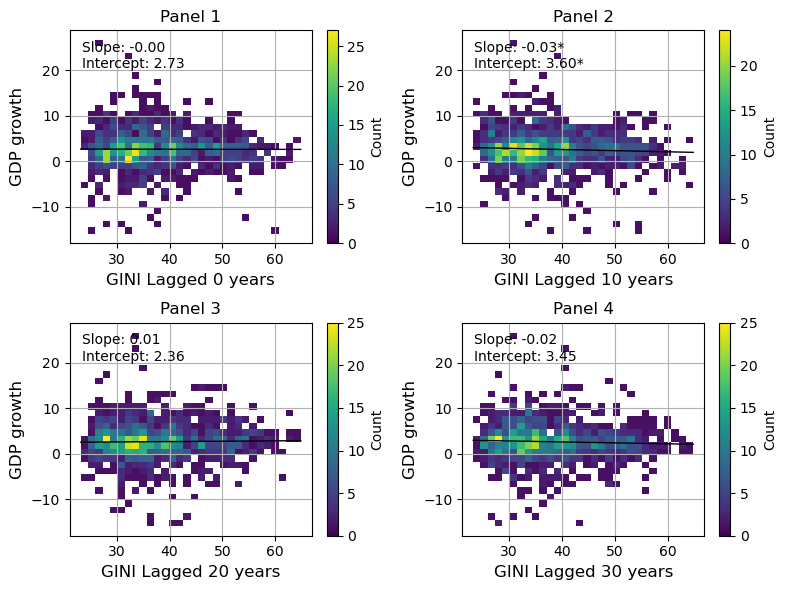

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.stats import linregress

# Drop missing
final_data2 = final_data.dropna(subset=['GINI', 'GDP_growth'], how='any')

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Loop through each subplot and plot the scatterplot with appropriate GINI lag
for i, ax in enumerate(axs.flatten()):
    # Lag GINI by i years
    final_data2['GINI_lagged'] = final_data2['GINI'].shift(i * 10)
    
    # Drop rows with missing values
    final_data2_filtered = final_data2.dropna(subset=['GINI_lagged', 'GDP_growth'], how='any')
    
    # Create scatterplot with size and color
    sns.histplot(x='GINI_lagged', y='GDP_growth', data=final_data2_filtered, ax=ax, bins=30, cbar=True, cmap='viridis', cbar_kws={'label': 'Count'})
    
    # Add regression line and display coefficients with significance stars
    slope, intercept, r_value, p_value, std_err = linregress(final_data2_filtered['GINI_lagged'], final_data2_filtered['GDP_growth'])
    significance_slope = ""
    significance_intercept = ""
    if p_value < 0.001:
        significance_slope = "***"
        significance_intercept = "***"
    elif p_value < 0.01:
        significance_slope = "**"
        significance_intercept = "**"
    elif p_value < 0.05:
        significance_slope = "*"
        significance_intercept = "*"
    
    # Add regression line to the scatterplot
    x = np.linspace(final_data2_filtered['GINI_lagged'].min(), final_data2_filtered['GINI_lagged'].max(), 100)
    y = slope * x + intercept
    ax.plot(x, y, color='black', linewidth=1)
    
    ax.annotate(f'Slope: {slope:.2f}{significance_slope}\nIntercept: {intercept:.2f}{significance_intercept}', xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top')
    
    ax.set_xlabel(f'GINI Lagged {i * 10} years', fontsize=12)  # x-axis label with lag
    ax.set_ylabel('GDP growth', fontsize=12)  # y-axis label
    ax.set_title(f'Panel {i + 1}', fontsize=12)  # plot title
    ax.grid(True)

plt.tight_layout()
plt.show()

In [21]:
list = ['COC', 'GOV', 'REQ', 'ROL', 'RSA', 'VOA']
X = final.loc[:,['COC', 'GOV', 'REQ', 'ROL', 'RSA', 'VOA']] #COC skal ændres til governance indikator
for i in list:
    X[i] = X[i].shift(-10) # COC skal ændres...

X = sm.add_constant(X)

y = final.loc[:,'GDP']

model = sm.OLS(y,X, missing='drop')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     167.9
Date:                Thu, 13 Apr 2023   Prob (F-statistic):          1.16e-186
Time:                        19:33:44   Log-Likelihood:                -36692.
No. Observations:                3298   AIC:                         7.340e+04
Df Residuals:                    3291   BIC:                         7.344e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.287e+04    287.912     44.692      0.000    1.23e+04    1.34e+04
COC         4427.2232    910.612      4.862      0.000    2641.799    6212.647
GOV         4528.0297   1055.222      4.291      0.000    2459.072    6596.988
REQ         1379.9440    863.740      1.598      0.110    -313.578    3073.466
ROL         1076.9086   1127.476      0.955      0.340   -1133.717    3287.534
RSA          300.2005    471.570      0.637      0.524    -624.401    1224.802
VOA        -3024.9700    531.464     -5.692      0.000   -4067.004   -1982.936
==============================================================================
Omnibus:                     1799.805   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18458.682
Skew:                           2.404   Prob(JB):                         0.00
Kurtosis:                      13.546   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
import statsmodels.api as sm 
list = ['COC', 'GOV', 'REQ', 'ROL', 'RSA', 'VOA']
X = final.loc[:,['COC', 'GOV', 'REQ', 'ROL', 'RSA', 'VOA']] #COC skal ændres til governance indikator
for i in list:
    X[i] = X[i].shift(-10) # COC skal ændres...

X = sm.add_constant(X)

y = final.loc[:,'GINI']

model = sm.OLS(y,X, missing='drop')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GINI   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     39.15
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           1.18e-42
Time:                        19:33:44   Log-Likelihood:                -3341.0
No. Observations:                 958   AIC:                             6696.
Df Residuals:                     951   BIC:                             6730.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.6003      0.283    136.448      0.000      38.045      39.155
COC            2.3628      0.891      2.653      0.008       0.615       4.111
GOV           -4.3596      1.093     -3.989      0.000      -6.504      -2.215
REQ            3.0411      0.863      3.525      0.000       1.348       4.734
ROL           -4.0386      1.156     -3.494      0.000      -6.307      -1.770
RSA           -1.9564      0.458     -4.275      0.000      -2.855      -1.058
VOA            1.4095      0.555      2.539      0.011       0.320       2.499
==============================================================================
Omnibus:                       58.181   Durbin-Watson:                   0.561
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.172
Skew:                           0.606   Prob(JB):                     1.57e-15
Kurtosis:                       3.491   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Sort dataset to contain years 2000-2020
years = range(2000, 2021)
final1 = final.loc[final['year'].isin(years)]
final1 = final1.dropna(subset=['GDP'], how='any')

# Detrend GDP
from scipy import signal
y = final1.loc[:, 'GDP']
y_detrended = signal.detrend(y)

# Calculate std. of GDP for each country
final1['std'] = final1.groupby('country')['GDP'].transform('std')

# Select only one year (=2017)
final2 = final1.loc[final['year'] == 2000]

# Regress std. on lagged governance
X = final2.loc[:, ['COC']]  # COC should be changed to governance indicator
X = sm.add_constant(X)

y = final2.loc[:, 'std']

model = sm.OLS(y, X, missing='drop')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    std   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     37.50
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           6.14e-09
Time:                        19:33:45   Log-Likelihood:                -1553.4
No. Observations:                 172   AIC:                             3111.
Df Residuals:                     170   BIC:                             3117.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1425.8404    155.212      9.186      0.000    1119.450    1732.231
COC          941.5879    153.758      6.124      0.000     638.066    1245.110
==============================================================================
Omnibus:                      253.216   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23129.848
Skew:                           6.336   Prob(JB):                         0.00
Kurtosis:                      58.379   Cond. No.                         1.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion

ADD CONCISE CONLUSION.